In [6380]:
path = "/home/fedflorio/master_thesis/MatrixProductBP.jl/notebooks/sis_inference_data/simulations/ER30_select_lambda_200_rho_200_step16_nobs100_seed2.jld2"
;

In [6381]:
using Pkg
Pkg.activate("/home/fedflorio/master_thesis/")

  Activating project at `~/master_thesis`


In [6382]:
using MatrixProductBP, MatrixProductBP.Models
using JLD2, SparseArrays, PyPlot
include("/home/fedflorio/master_thesis/Utilities/roc.jl");

In [6383]:
D = load(path)

data = D["data"]
λ_true = D["λ"]
params_history = D["params_history"]
;

In [6384]:
# for i in eachindex(data.λ)
#     data.λ[i] = vcat(data.λ[i][1:i-1],data.λ[i][i+1:end])
# end
data.λ

30-element Vector{Vector{Float64}}:
 [0.0, 0.010058925934558557, 0.013605150163622617, 0.0, 0.012524724114962967, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.010019891408179401, 0.012962228393689764, 0.0]
 [0.0, 0.00997371279670946, 0.009160581197806392, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.01035673978475431  …  0.009569228545462858, 0.00966941940793405, 0.009471582523515426, 0.0, 0.008751497239944592, 0.009551712333156421, 0.0, 0.0, 0.0, 0.0]
 [1.0e-9, 1.0e-9, 1.0e-9, 1.0e-9, 1.0e-9, 1.0e-9, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
 [0.010528130871893927, 0.010974494123536814, 0.010010362472694295, 0.010315989209024368, 0.011027018188897668, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.010593325662708628, 0.0, 0.0, 0.01079889800216636, 0.011073586495834717, 0.0, 0.0, 0.0, 0.0, 0.0]
 [0.0, 0.0, 0.010015836315160552, 0.012413721335332183, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.012135111067818694, 0.0, 0.0, 0.0, 0.012059042421201075, 0.0, 0.0, 0.0, 0.01026959

In [6385]:
timept = 1
timept = length(params_history)

_data = [params_history[timept].λ[i][j] for i in eachindex(params_history[timept].λ) for j in eachindex(params_history[timept].λ[i])]
_history = [params_history[timept-1].λ[i][j] for i in eachindex(params_history[timept-1].λ) for j in eachindex(params_history[timept-1].λ[i])]

Δ = maximum((_data .- _history)./_data)
println("Δ($(timept)) = $(Δ)")

Δ(2) = NaN


auc = 0.7458074333074333


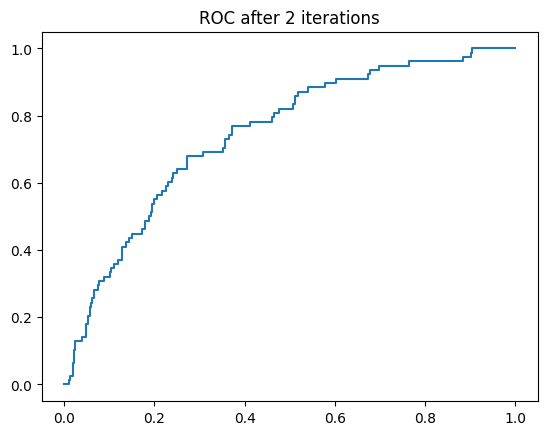

In [6386]:
λ = params_history[timept].λ
λ = data.λ
xplot, yplot, area = roccurve(λ, λ_true)
close("all")
plot(xplot,yplot)
title("ROC after $(length(params_history)) iterations")
println("auc = $area")

In [6387]:
auc_iterations = []
for p in params_history
    area = roccurve(p.λ, λ_true)[3]
    push!(auc_iterations, area)
    println(area)
end

m = argmax(auc_iterations)
println("\nMax AUC for $(m) iterations\nAUC = $(auc_iterations[m])")

0.7445286195286195
0.7458074333074333

Max AUC for 2 iterations
AUC = 0.7458074333074333
